In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
listings_full = pd.read_csv('../madrid/listings_detailed/listings_detailed.csv', low_memory=False)
calendar = pd.read_csv('../madrid/calendar/calendar.csv')
reviews_detailed = pd.read_csv('../madrid/reviews_detailed/reviews_detailed.csv')
neighbourhoods = pd.read_csv('../madrid/neighbourhoods.csv')
neighbourhoods_gdf = gpd.read_file('../madrid/neighbourhoods.geojson')
reviews = pd.read_csv('../madrid/reviews/reviews.csv')


In [3]:
display(listings_full.head())
listings_full.shape


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190919050215,2019-09-19,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,2 days ago,t,14,23,53,53,2019-09-19,65,6,2010-03-14,2019-09-04,98.0,10.0,10.0,9.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.56
1,21853,https://www.airbnb.com/rooms/21853,20190919050215,2019-09-19,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluc

(20837, 106)

###### 1. Analizamos las columnas de los distintos csv y sus datos.

In [4]:
display(calendar.head())
calendar.shape


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,336834,2019-09-19,f,$63.00,$63.00,5,250
1,6369,2019-09-19,f,$70.00,$70.00,1,365
2,6369,2019-09-20,f,$75.00,$75.00,1,365
3,6369,2019-09-21,f,$75.00,$75.00,1,365
4,6369,2019-09-22,t,$70.00,$70.00,1,365


(7605505, 7)

In [5]:
display(reviews_detailed.head())
reviews_detailed.shape

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


(732710, 6)

In [6]:
display(neighbourhoods.head())
neighbourhoods.shape

,neighbourhood_group,neighbourhood
0,Arganzuela,Acacias
1,Arganzuela,Atocha
2,Arganzuela,Chopera
3,Arganzuela,Delicias
4,Arganzuela,Imperial


(128, 2)

In [7]:
display(neighbourhoods_gdf.head())
neighbourhoods_gdf.shape

,neighbourhood,neighbourhood_group,geometry
0,Palacio,Centro,"MULTIPOLYGON (((-3.70584 40.42030, -3.70625 40..."
1,Embajadores,Centro,"MULTIPOLYGON (((-3.70384 40.41432, -3.70277 40..."
2,Cortes,Centro,"MULTIPOLYGON (((-3.69796 40.41929, -3.69645 40..."
3,Justicia,Centro,"MULTIPOLYGON (((-3.69546 40.41898, -3.69645 40..."
4,Universidad,Centro,"MULTIPOLYGON (((-3.70107 40.42134, -3.70155 40..."


(128, 3)

In [8]:
display(reviews.head())
reviews.shape

,listing_id,date
0,6369,2010-03-14
1,6369,2010-03-23
2,6369,2010-04-10
3,6369,2010-04-21
4,6369,2010-04-26


(732710, 2)

###### 2. Eliminamos las columnas de listings_full que no van a ser de mucha utilidad tanto por repeteción de datos en otras columnas como por los propios datos.

In [9]:
columns_out =['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
              'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
              'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 
              'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 
              'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
              'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
              'host_identity_verified', 'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market', 'smart_location',
              'country_code', 'country', 'is_location_exact', 'square_feet', 'weekly_price', 'monthly_price', 'minimum_minimum_nights', 'maximum_minimum_nights',
              'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
              'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review',
              'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready',
              'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification','review_scores_rating', 'review_scores_accuracy',
              'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
              'review_scores_value', 'reviews_per_month'
              ]

listings_full = listings_full.drop(columns=columns_out, axis=1)


In [10]:
listings_full.head()

,id,host_id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6369,13660,f,Hispanoamérica,Chamartín,40.45628,-3.67763,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",$70.00,$0.00,$5.00,2,$15.00,1,365,14,23,53,53,65,6,1,0,1,0
1,21853,83531,f,Cármenes,Latina,40.40341,-3.74084,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$17.00,NaN,NaN,1,$8.00,4,40,0,0,0,48,33,0,2,0,2,0
2,24805,101471,f,Universidad,Centro,40.42202,-3.70395,Apartment,Entire home/apt,3,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",$80.00,$200.00,$30.00,2,$0.00,5,730,19,49,79,354,2,0,1,1,0,0
3,24836,101653,t,Justicia,Centro,40.41995,-3.69764,Apartment,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$115.00,$200.00,$0.00,4,$0.00,3,1125,3,18,48,301,64,18,1,1,0,0
4,26825,114340,f,Legazpi,Arganzuela,40.38985,-3.69011,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",$25.00,NaN,$15.00,1,$0.00,2,365,13,40,70,337,136,27,1,0,1,0


In [11]:
listings_full.shape

(20837, 32)

###### 3. Buscamos si existen o no duplicados.

In [12]:
if listings_full.duplicated().any():
    print("Hay duplicados en el dataframe")
else:
    print("No hay duplicados en el dataframe")

No hay duplicados en el dataframe


##### 4. Buscamos el porcentaje de nulos por columna.

In [13]:
null_percentages = listings_full.isna().mean() * 100
null_percentages

id                                               0.000000
host_id                                          0.000000
host_is_superhost                                0.071987
neighbourhood_cleansed                           0.000000
neighbourhood_group_cleansed                     0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms                                        0.047992
bedrooms                                         0.043192
beds                                             0.244757
bed_type                                         0.000000
amenities                                        0.000000
price                                            0.000000
security_deposit                                33.214954
cleaning_fee  

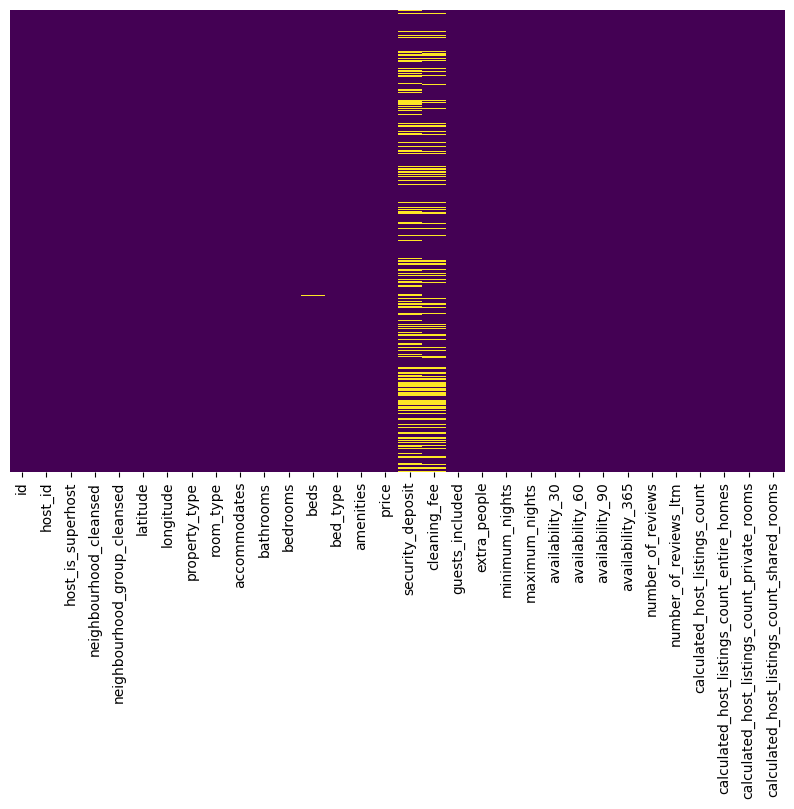

In [14]:
plt.figure(figsize=(10, 6))  

sns.heatmap(listings_full.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [18]:
#La función nos indica las columnas con valores nulos y sus porcentajes.
def columnas_con_nulos(listings_full):
    num_nulos = listings_full.isnull().sum()
    porcentaje_nulos = (num_nulos / len(listings_full)) * 100
    columnas_con_nulos = listings_full.columns[listings_full.isnull().any()]
    
    for col in columnas_con_nulos:
        print(f"{col} contiene {porcentaje_nulos[col]}% nulos.")
columnas_con_nulos(listings_full)

host_is_superhost contiene 0.07198733022987953% nulos.
bathrooms contiene 0.04799155348658636% nulos.
bedrooms contiene 0.043192398137927725% nulos.
beds contiene 0.24475692278159042% nulos.
security_deposit contiene 33.21495416806642% nulos.
cleaning_fee contiene 25.22915966789845% nulos.


###### 5. Nos centramos en las dos columnas con más valores nulos: security_deposit y cleaning_fee 

In [19]:
# Analizando ambas columnas entendemos que lo más adecuado es cambiar los valores nulos de las dos columnas por 0, entendiendo que no existe depósito de seguridad ni tarifa de limpieza o que vienen incluidas en el precio. 

In [20]:
listings_full["security_deposit"].fillna(0, inplace=True)
listings_full["cleaning_fee"].fillna(0, inplace=True)


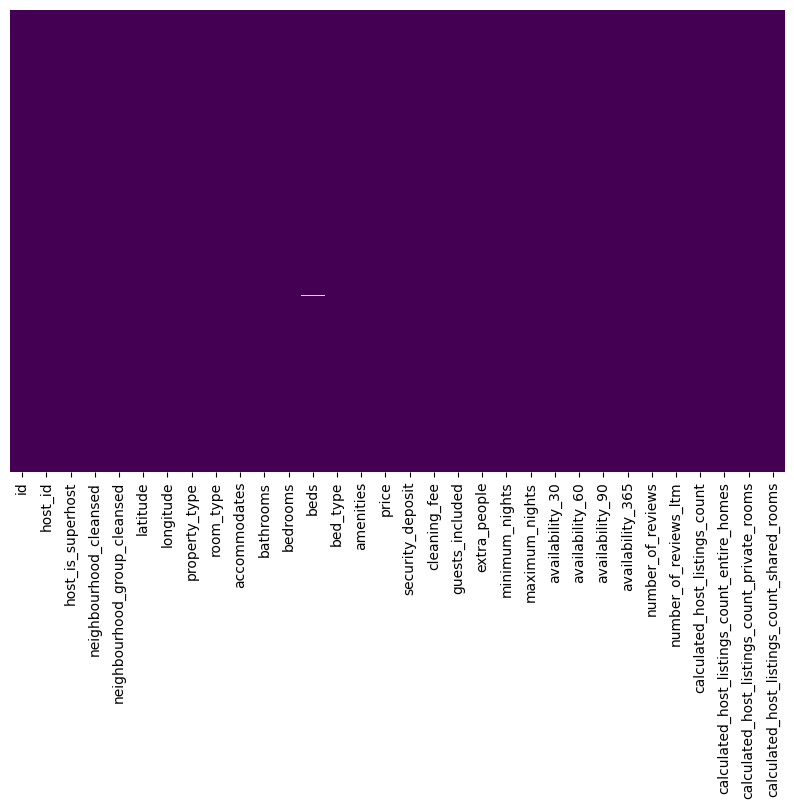

In [21]:
plt.figure(figsize=(10, 6))  

sns.heatmap(listings_full.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [22]:
columnas_con_nulos(listings_full)

host_is_superhost contiene 0.07198733022987953% nulos.
bathrooms contiene 0.04799155348658636% nulos.
bedrooms contiene 0.043192398137927725% nulos.
beds contiene 0.24475692278159042% nulos.


##### 6. Limpiamos los últimos nulos

In [23]:
#El porcentaje de nulos es muy bajo, por tanto eliminaremos los nulos que quedan por filas en este caso para dejarlo completamente limpio.

In [24]:
listings_full.dropna(axis=0, inplace=True)

In [25]:
columnas_con_nulos(listings_full)

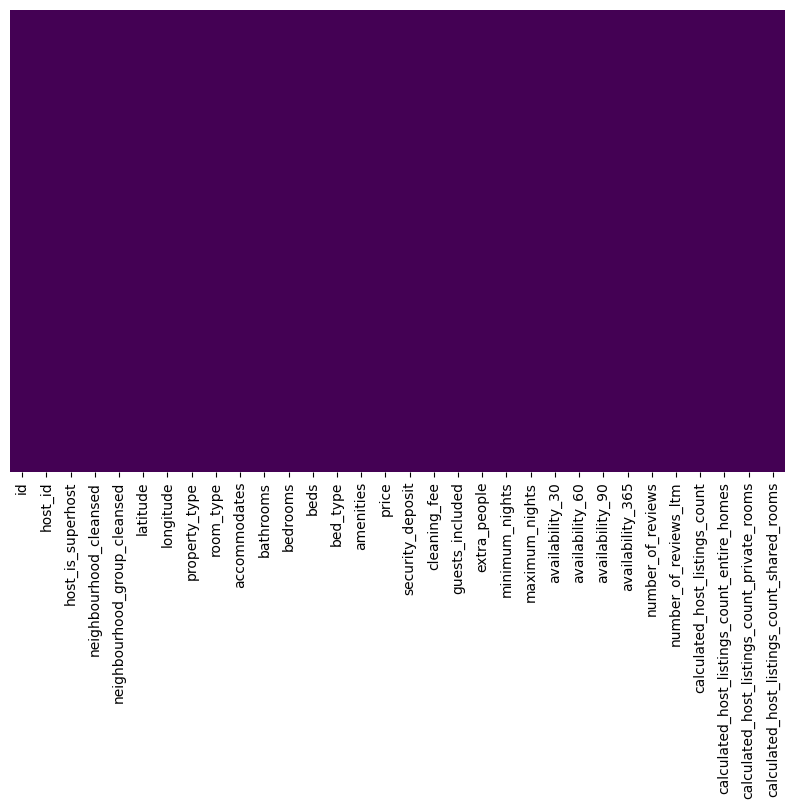

In [26]:
plt.figure(figsize=(10, 6))  

sns.heatmap(listings_full.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [27]:
listings_full.shape

(20758, 32)

In [28]:
listings_full.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20836
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20758 non-null  int64  
 1   host_id                                       20758 non-null  int64  
 2   host_is_superhost                             20758 non-null  object 
 3   neighbourhood_cleansed                        20758 non-null  object 
 4   neighbourhood_group_cleansed                  20758 non-null  object 
 5   latitude                                      20758 non-null  float64
 6   longitude                                     20758 non-null  float64
 7   property_type                                 20758 non-null  object 
 8   room_type                                     20758 non-null  object 
 9   accommodates                                  20758 non-null 

In [29]:
#No tenemos nulos ni duplicados